## Observations and Insights 

In [1]:
%matplotlib inline
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_df = mouse_metadata.rename(columns={'Mouse ID':'mouse_id','Drug Regimen':'drug_regimen','Sex':'sex','Age_months':'age_months','Weight (g)':'weight'})
study_df = study_results.rename(columns={'Mouse ID':'mouse_id','Timepoint':'timepoint','Tumor Volume (mm3)':'tumor_volume','Metastatic Sites':'metastatic_sites'})
study_df.head()
#study_results['Mouse ID'].nunique()
#study_results.nunique()

,mouse_id,timepoint,tumor_volume,metastatic_sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [2]:
# Combine the data into a single dataset
df = pd.merge(mouse_df, study_df, how="left", on=["mouse_id", "mouse_id"])
df.head()
# Display the data table for preview

,mouse_id,drug_regimen,sex,age_months,weight,timepoint,tumor_volume,metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
df.count()

mouse_id            1893
drug_regimen        1893
sex                 1893
age_months          1893
weight              1893
timepoint           1893
tumor_volume        1893
metastatic_sites    1893
dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#ids = df["mouse_id","timepoint"]
#df[ids.isin(ids[ids.duplicated()])]

results = df.groupby(["mouse_id","timepoint"]).size()
results = results[results > 1]
results

mouse_id  timepoint
g989      0            2
          5            2
          10           2
          15           2
          20           2
dtype: int64

In [5]:
df.describe()
#df.to_csv(r'data/merge_dataset.csv', index = False)
#df.head()

,age_months,weight,timepoint,tumor_volume,metastatic_sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
#df = df[study_df.duplicated(subset=['mouse_id','timepoint'], keep=False)]
#print (df)
#df.value_counts(subset=['mouse_id','timepoint'],normalize=True)

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.drop_duplicates(subset=['mouse_id','timepoint'])
#clean_df.to_csv(r'data/merge_dataset.csv', index = False)
#df.head()

In [7]:
clean_df.describe()

,age_months,weight,timepoint,tumor_volume,metastatic_sites
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,12.792903,25.661547,19.597458,50.449276,1.023835
std,7.186737,3.926776,14.084762,8.904565,1.138507
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951421,1.000000
75%,20.000000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [8]:
clean_df.head()

,mouse_id,drug_regimen,sex,age_months,weight,timepoint,tumor_volume,metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
df['mouse_id'].nunique()

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#sum_df = clean_df.groupby(['drug_regimen','tumor_volume'])
sum_df = clean_df.groupby(['drug_regimen'])
sum_df.head()

,mouse_id,drug_regimen,sex,age_months,weight,timepoint,tumor_volume,metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [11]:
groupcols_df = sum_df[['mouse_id','drug_regimen','tumor_volume']].agg({'tumor_volume':['mean','median','var','std','sem']})
groupcols_df.head()

tumor_volume                                          
                     mean     median        var       std       sem
drug_regimen                                                       
Capomulin       40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin        52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol       52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril        55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol        54.331565  52.509285  66.173479  8.134708  0.596466

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [37]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
msum_df = sum_df['mouse_id'].count()
#msum_df = msum_df.reset_index()
#dreg_df = sum_df['drug_regimen'].nunique()
#dreg_df = sum_df.nunique()
msum = msum_df.reset_index()
#dreg_df = dreg_df.reset_index()
#dreg_df
msum

,drug_regimen,mouse_id
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


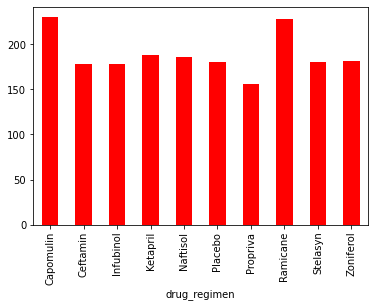

In [38]:
plotit = msum_df
plotit.plot(kind="bar", facecolor="red");
#msum

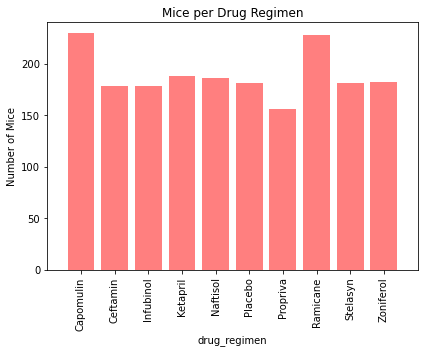

In [49]:
msum2 = msum['drug_regimen'].tolist()
x_axis = np.arange(1,len(msum2) + 1)
tick_locations = [value for value in x_axis]
plt.figure(figsize=(6,5))
#msum2 = msum_df['drug_regimen']
#plt.bar(x_axis, msum_df, color="r", alpha=0.5, align="center")
plt.bar(x_axis, msum['mouse_id'], color="r", alpha=0.5, align="center")
plt.xticks(tick_locations, msum2, rotation="vertical")
plt.xlim(0, len(x_axis) + 1)
plt.ylim(0, max(msum['mouse_id'])+10)
plt.title("Mice per Drug Regimen")
plt.xlabel("drug_regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()
plt.show()

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
